In [1]:
import requests
import h5py
import matplotlib.pyplot as plt
import numpy as np


In [2]:
baseurl = 'http://www.illustris-project.org/api/'
headers = {"api-key":"16f22129662d834710bc1f45317d59d0"}


In [3]:
def get(path, params=None):

    r = requests.get(path, params=params, headers=headers)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json()
    

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename
    
    return r
    

In [4]:
r = get(baseurl)

sim = get(r['simulations'][4]['url'])

snapshots = get(sim['snapshots'])

last_snap = get( snapshots[-1]['url'])

subhalos_by_mass = get(last_snap['subhalos'], {'limit':10, 'order_by':'-mass_stars'})

#print([subhalos_by_mass['results'][i]['id'] for i in range(5)])

most_massive_subhalo = get( subhalos_by_mass['results'][0]['url'])


individual_subhalo = get(subhalos_by_mass['results'][4]['url'])


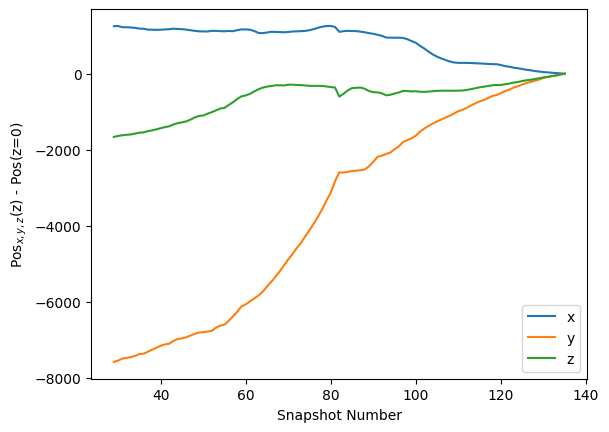

In [5]:
mpb1 = get(individual_subhalo['trees']['sublink_mpb'])
f = h5py.File(mpb1, 'r')
f.close()
mpb2 = get(individual_subhalo['trees']['lhalotree_mpb'])

with h5py.File(mpb2, 'r') as f:
    pos = f['SubhaloPos'][:]
    snapnum = f['SnapNum'][:]
    subid = f['SubhaloNumber'][:]


for i in range(3):
    plt.plot(snapnum,pos[:,i] - pos[0,i], label=['x', 'y', 'z'][i])

plt.legend()
plt.xlabel('Snapshot Number')
plt.ylabel('Pos$_{x,y,z}$(z) - Pos(z=0)')
plt.show()


In [6]:
"""
url_z1 = sim['snapshots'] + "z=1/"

snap = get(url_z1)
snapnumber = snap['number']
i = np.where(snapnum==85)
"""

'\nurl_z1 = sim[\'snapshots\'] + "z=1/"\n\nsnap = get(url_z1)\nsnapnumber = snap[\'number\']\ni = np.where(snapnum==85)\n'

In [ ]:
sub_prog_url = "http://www.illustris-project.org/api/Illustris-3/snapshots/85/subhalos/15/"
sub_prog = get(sub_prog_url)


cutout_request = {'dm':'Coordinates,SubfindDensity'}
cutout = get(sub_prog_url+"cutout.hdf5", cutout_request)

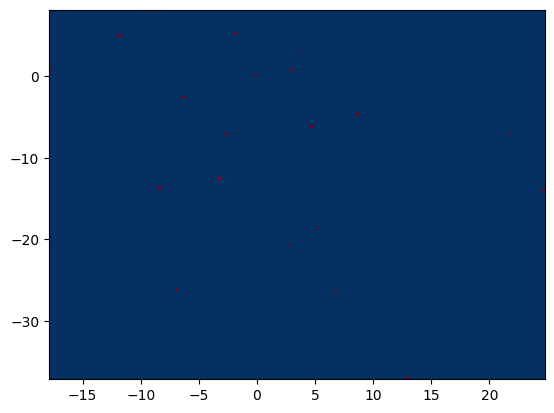

In [36]:
with h5py.File(cutout, 'r') as f:
    x = f['PartType1']['Coordinates'][:,0] - sub_prog['pos_x']
    y = f['PartType1']['Coordinates'][:,1] - sub_prog['pos_y']
    wgt = np.log10(f['PartType1']['SubfindDensity'][:])

plt.hist2d(x,y, weights=wgt,bins=[150,150], cmap='RdBu')
plt.show()